<a href="https://colab.research.google.com/github/beastNico/Data-Analysis/blob/main/Health_Sleep_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Sleep Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [3]:
df.size

1200

In [4]:
df.shape

(100, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [6]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [7]:
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [8]:
df.duplicated().sum()

0

## **Age vs Sleep Quality**


Finding Correlation

In [9]:
age_vs_sleep_quality_corr = df[['Age', 'Sleep Quality']].corr()
age_vs_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [10]:
relation_coeff = age_vs_sleep_quality_corr.iloc[0,1]
relation_coeff

-0.8483562912262651

Visualising Relationship

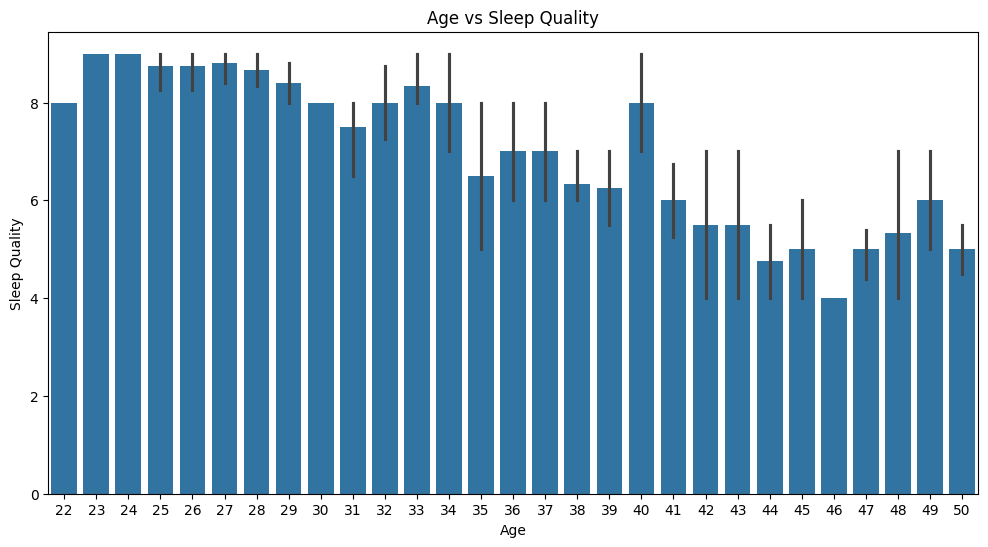

In [11]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Age', y = 'Sleep Quality', data = df)
plt.title('Age vs Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.show()

Linear Regression on Age vs Sleep Quality

In [12]:
from sklearn.linear_model import LinearRegression

X = df[['Age']]
Y = df['Sleep Quality']

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

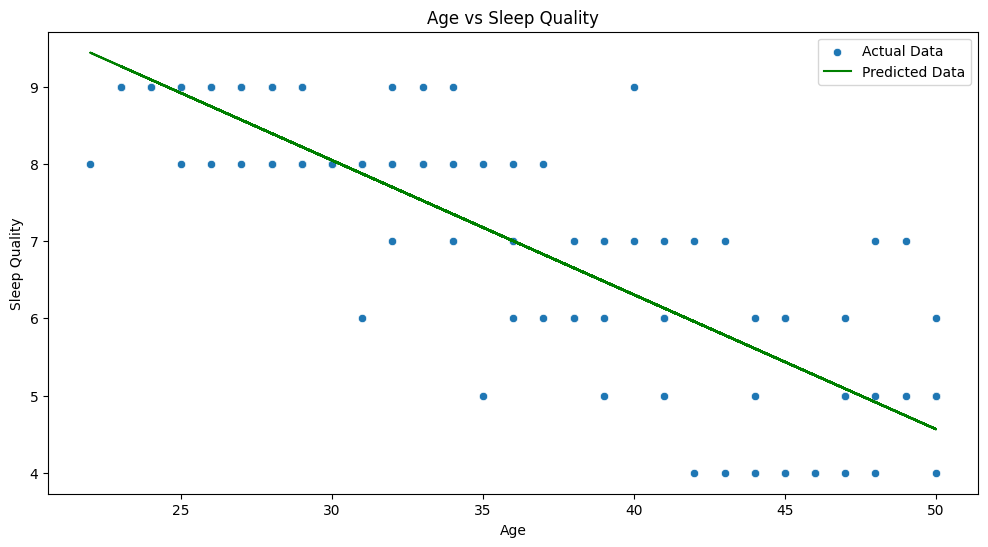

In [13]:
plt.figure(figsize  = (12, 6))
sns.scatterplot(x = 'Age', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'green', label = 'Predicted Data')

plt.title('Age vs Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.legend()
plt.show()


In [14]:
model.coef_

array([-0.17408531])

In [15]:
model.intercept_

13.268812023190648

## **Gender vs Sleep Quality**

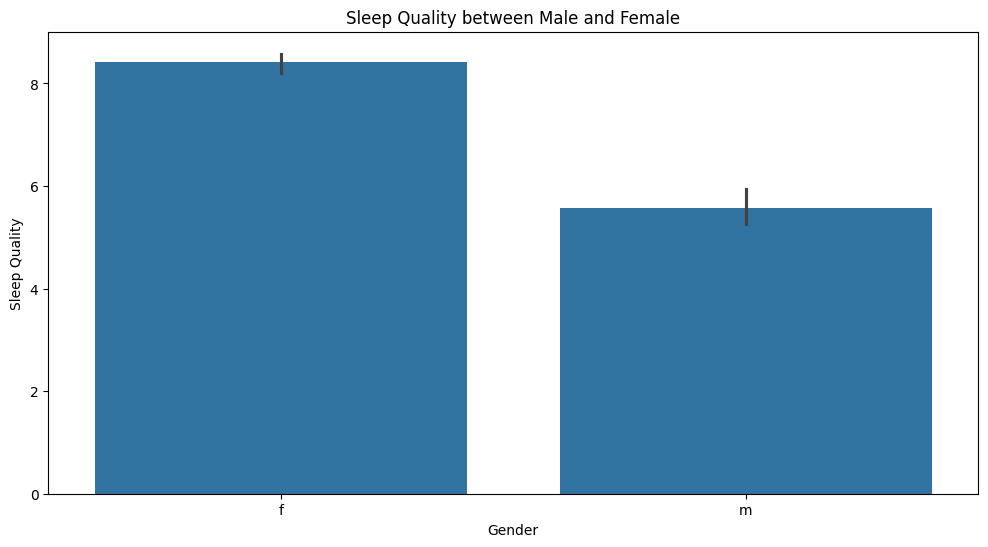

In [16]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Gender', y = 'Sleep Quality', data = df)
plt.title('Sleep Quality between Male and Female')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

The Females have better sleep quality than the Males

In [17]:
# Define custom codes for physical activity level

custom_codes = {'low': 1, 'medium': 2, 'high': 3}

df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)

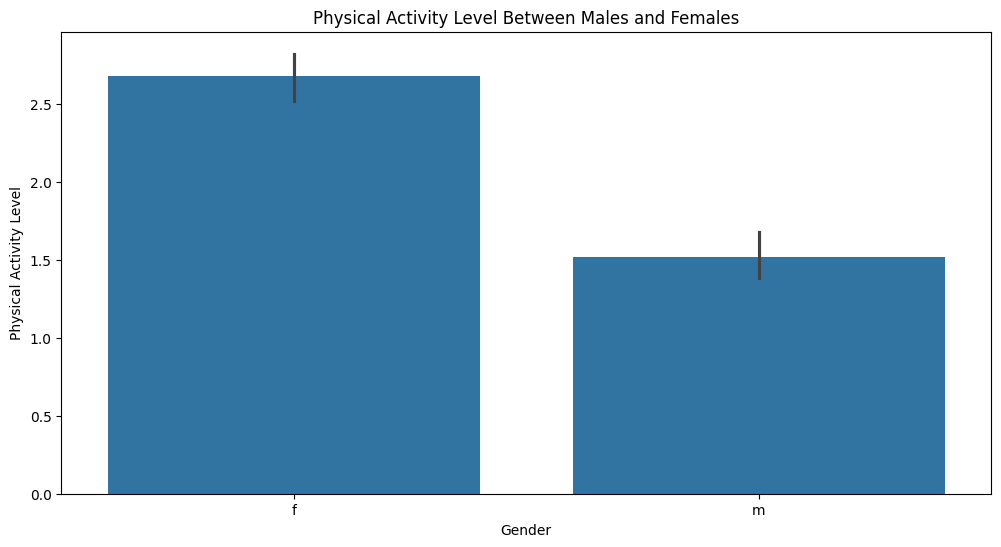

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level Between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Physical Activity Level')
plt.show()

The Females do more physical activity than the Males

In [19]:
from scipy import stats

sleep_quality_males = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_females = df[df['Gender'] == 'f']['Sleep Quality']

t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females, nan_policy = 'omit')

phycial_activity_males = df[df['Gender'] == 'm']['Physical Activity Level']
phycial_activity_females = df[df['Gender'] == 'f']['Physical Activity Level']

t_phycial_activity, p_phycial_activity = stats.ttest_ind(phycial_activity_males, phycial_activity_females, nan_policy = 'omit')

In [20]:
print(f't-sleep-quality = {t_sleep_quality: .2f}')
print(f'p-sleep-quality = {p_sleep_quality: .2f}')
print(f't-phycial-activity = {t_phycial_activity: .2f}')
print(f'p-phycial-activity = {p_phycial_activity: .2f}')

t-sleep-quality = -14.32
p-sleep-quality =  0.00
t-phycial-activity = -10.98
p-phycial-activity =  0.00


## **Timing of Sleep and Waking Up time vs Sleep Quality**



In [21]:
def sleep_duration_hours_helper_function(str_time):
  if isinstance(str_time, str):
    h = int(str_time.split(':')[0])
    m = int(str_time.split(':')[1])
    return h + m/60
  else:
    return float('nan')

df['Bedtime'] = df['Bedtime'].apply(sleep_duration_hours_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_duration_hours_helper_function)

df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no
1,2,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes
2,3,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no
3,4,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no
4,5,22,f,8,23.50,7.00,10000,2800,3,medium,no,no


In [22]:
df['Sleep Duration'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration
0,1,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,2,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,3,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,4,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,5,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


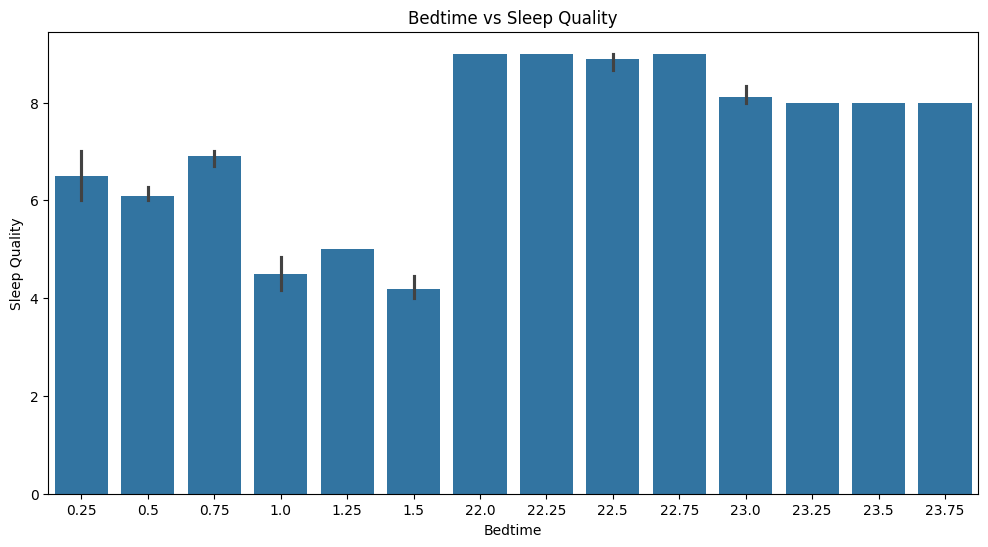

In [23]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Bedtime', y = 'Sleep Quality', data = df)
plt.title('Bedtime vs Sleep Quality')
plt.xlabel('Bedtime')
plt.ylabel('Sleep Quality')
plt.show()

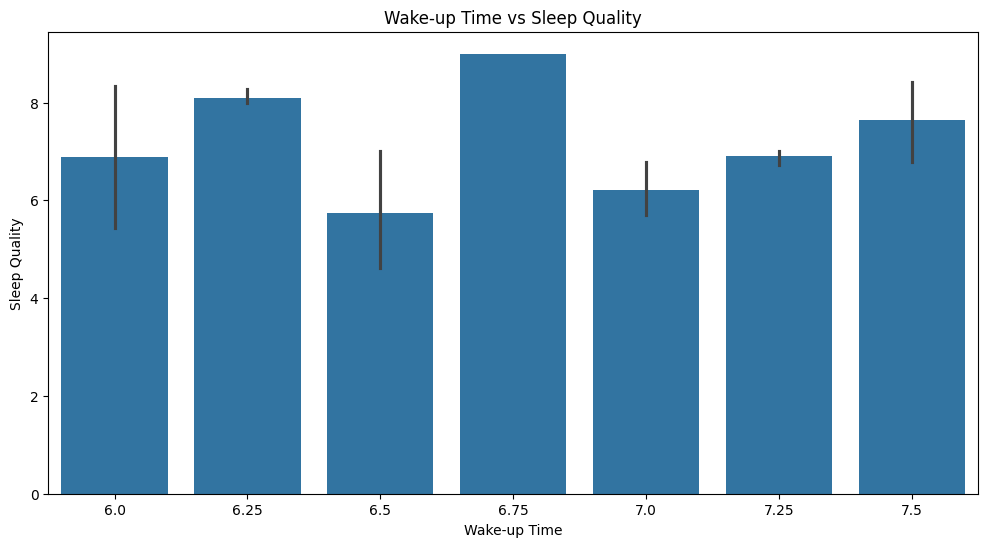

In [24]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Wake-up Time', y = 'Sleep Quality', data = df)
plt.title('Wake-up Time vs Sleep Quality')
plt.xlabel('Wake-up Time')
plt.ylabel('Sleep Quality')
plt.show()

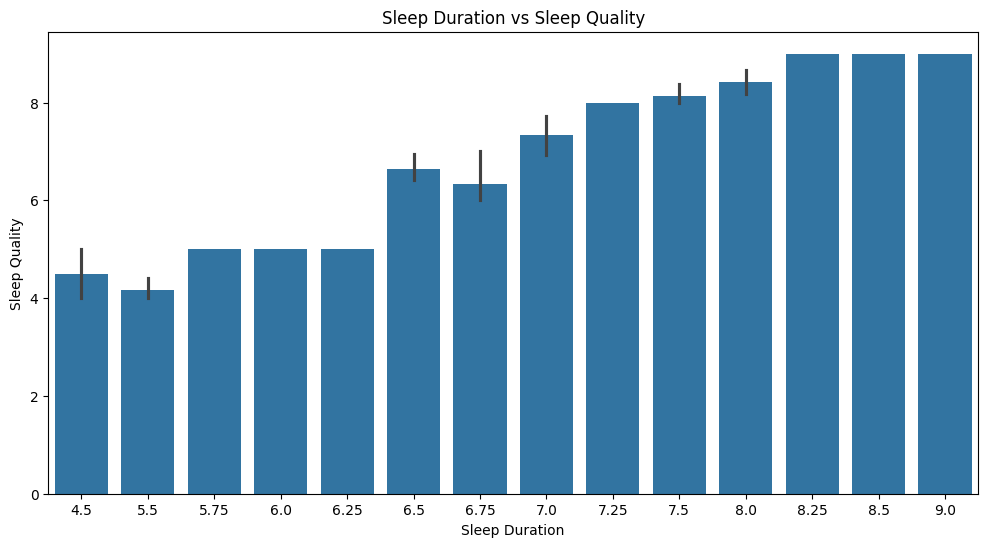

In [25]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Sleep Duration', y = 'Sleep Quality', data = df)
plt.title('Sleep Duration vs Sleep Quality')
plt.xlabel('Sleep Duration')
plt.ylabel('Sleep Quality')
plt.show()

Checking Linear Relationship between Sleep Time Hours & Sleep Quality

In [26]:
X = df[['Sleep Duration']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

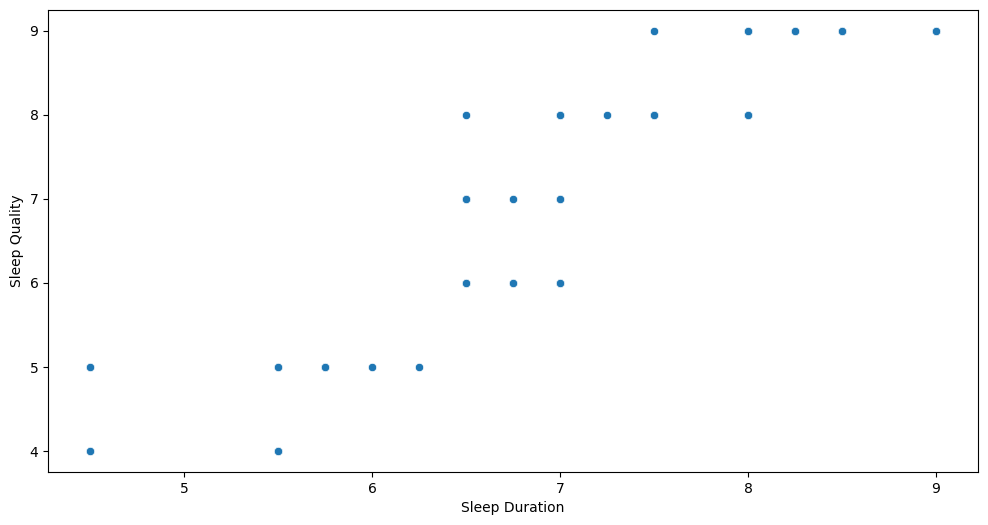

In [27]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Sleep Duration', y = 'Sleep Quality', data = df)
plt.show()

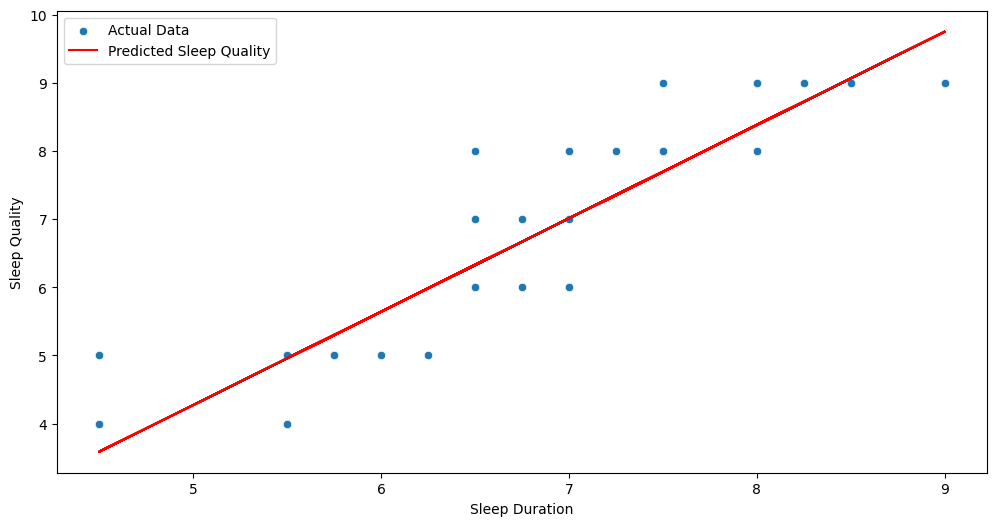

In [28]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Sleep Duration', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'red', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import r2_score
r2_score(Y, model.predict(X))

0.8443929044393099

## **Physical Activity vs Sleep Quality**

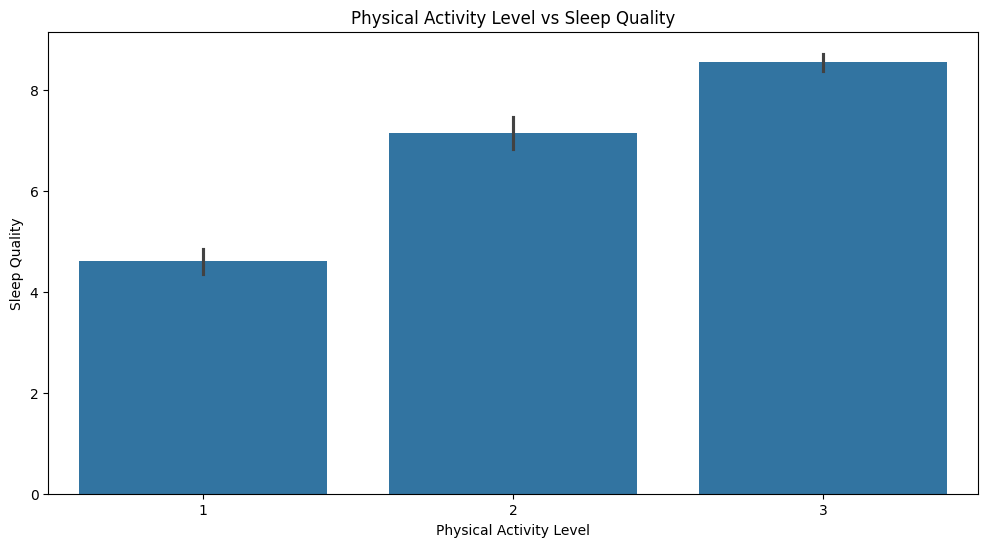

In [30]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Physical Activity Level', y = 'Sleep Quality', data = df)
plt.title('Physical Activity Level vs Sleep Quality')
plt.show()

## **Amount of calories burnt vs Sleep Quality**

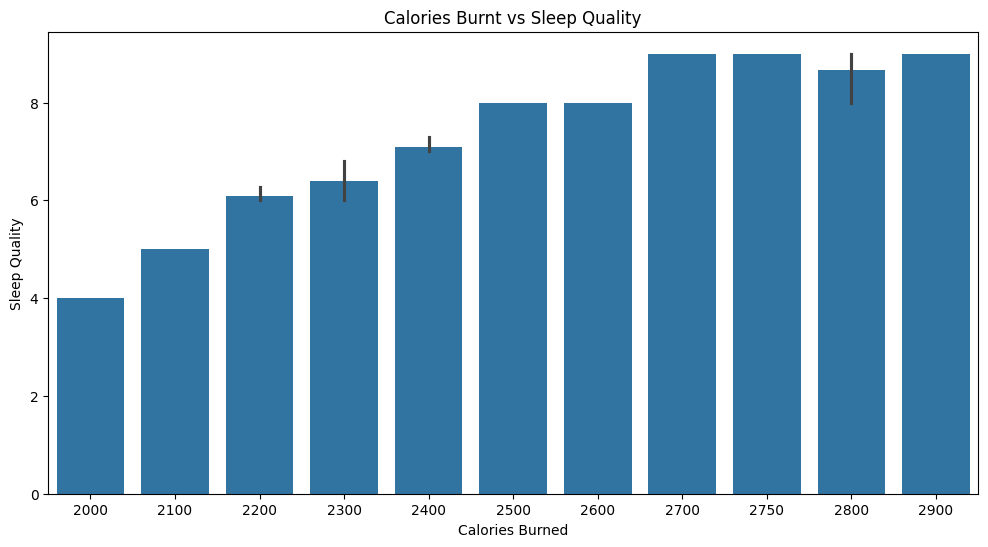

In [31]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.title('Calories Burnt vs Sleep Quality')
plt.show()

In [32]:
model = LinearRegression()

X = df[['Calories Burned']]
Y = df['Sleep Quality']

model.fit(X, Y)

LinearRegression()

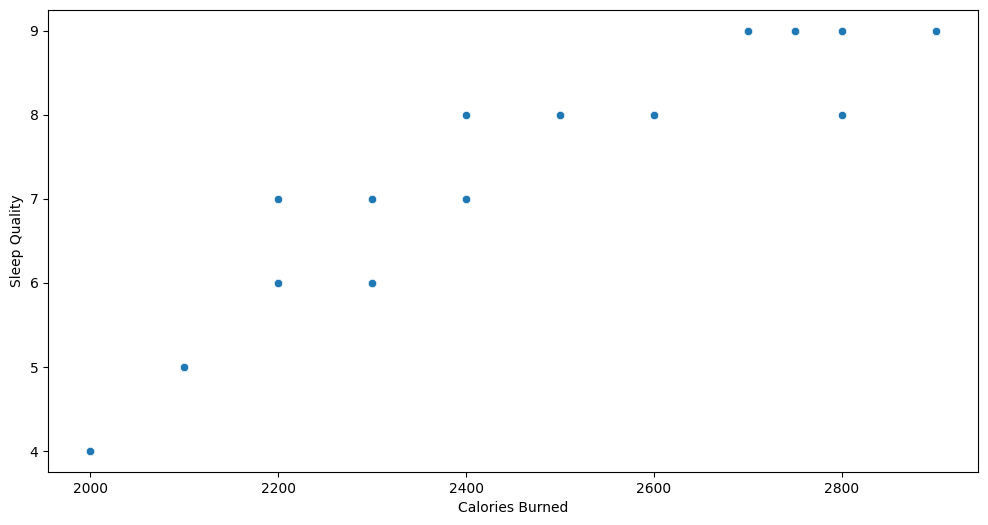

In [33]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

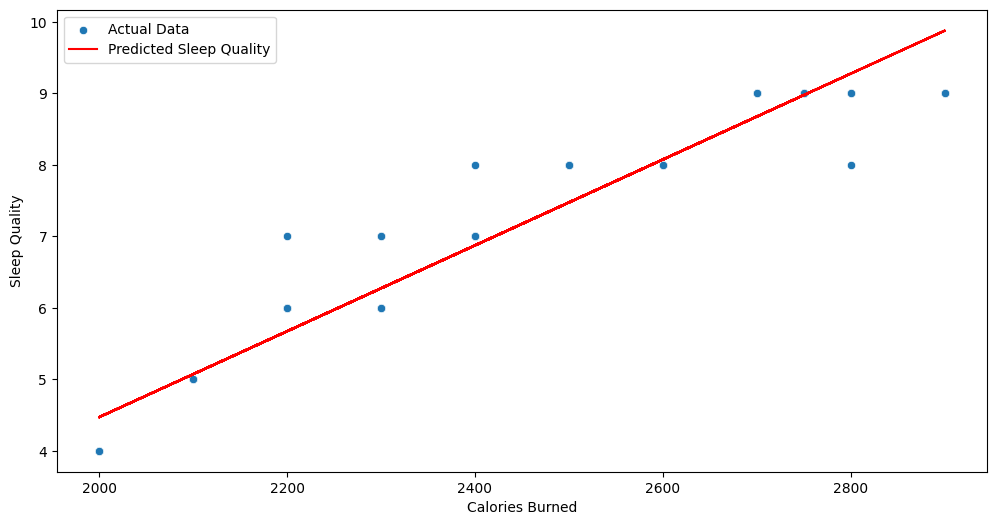

In [34]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'red', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()

In [35]:
r2_score(Y, model.predict(X))

0.9478131260919267

## I**mpact of Dietary Habits on Sleep Quality**

In [36]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
unhealthy,41
medium,30
healthy,29


In [37]:
custom_codes = {'unhealthy': 1, 'medium': 2, 'healthy': 3}

# Apply the custom codes using map()
df['Dietary Habits'] = df['Dietary Habits'].map(custom_codes)
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration
0,1,25,f,8,23.00,6.50,8000,2500,2,3,no,no,7.5
1,2,34,m,7,0.50,7.00,5000,2200,1,1,yes,yes,6.5
2,3,29,f,9,22.75,6.75,9000,2700,3,3,no,no,8.0
3,4,41,m,5,1.00,6.50,4000,2100,1,1,yes,no,5.5
4,5,22,f,8,23.50,7.00,10000,2800,3,2,no,no,7.5


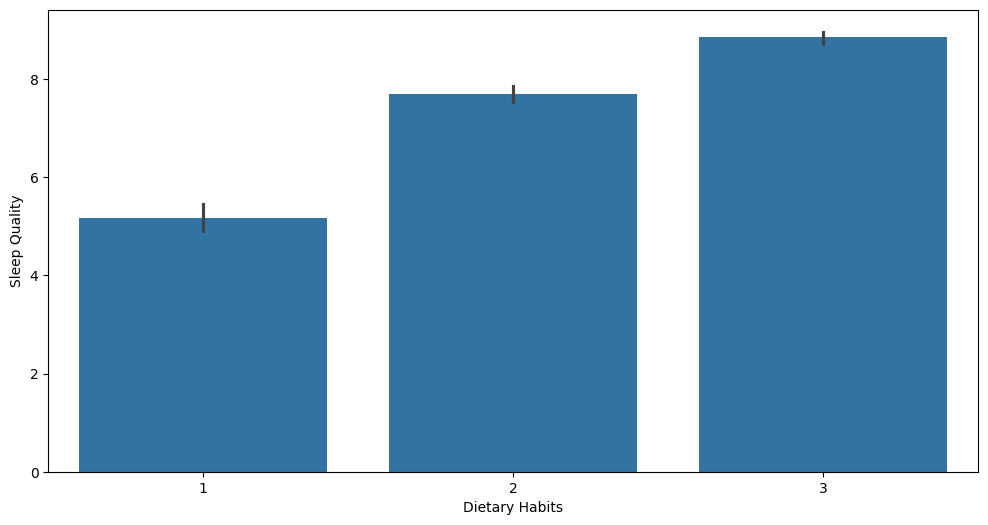

In [38]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Dietary Habits', y = 'Sleep Quality', data = df)
plt.show()

## **Sleep Disorder vs Sleep Quality**

In [39]:
df['Sleep Disorders'].head()

,Sleep Disorders
0,no
1,yes
2,no
3,yes
4,no


In [40]:
sleep_disorder_sleep_quality_summary = df.groupby('Sleep Disorders').agg({
    'Sleep Quality' : ['mean', 'std'],
    'Physical Activity Level' : lambda x: x.value_counts().to_dict()
})
print(sleep_disorder_sleep_quality_summary)

                Sleep Quality           Physical Activity Level
                         mean       std                <lambda>
Sleep Disorders                                                
no                   7.837838  1.085736          {2: 38, 3: 36}
yes                  4.615385  0.697247                 {1: 26}


Sleep Disorder affects on Physical Activity

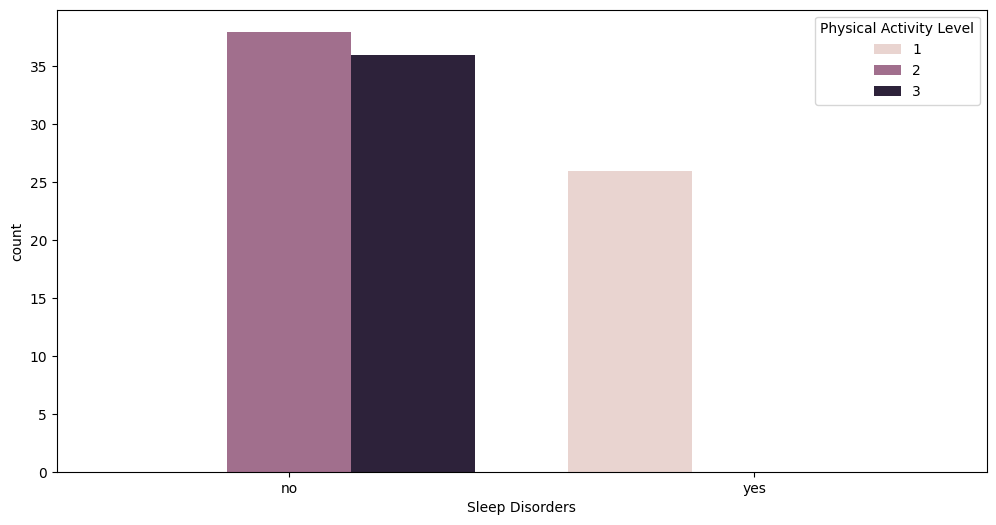

In [41]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Sleep Disorders', hue = 'Physical Activity Level', data = df)
plt.show()

Sleep Disorder vs Sleep Quality

Text(0, 0.5, 'Sleep Quality')

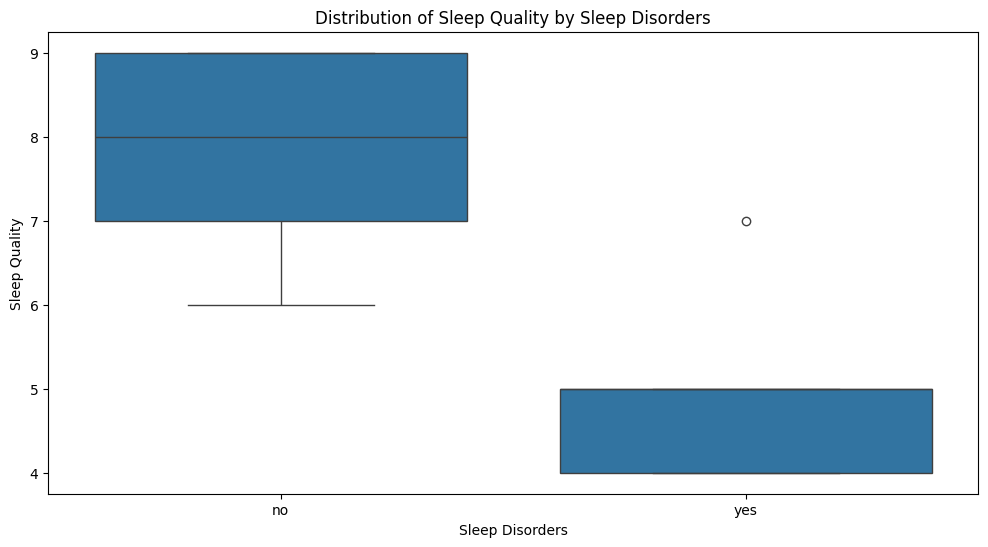

In [42]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Sleep Disorders', y = 'Sleep Quality', data = df)
plt.title('Distribution of Sleep Quality by Sleep Disorders')
plt.xlabel('Sleep Disorders')
plt.ylabel('Sleep Quality')

In [43]:
yes_sleep_disorder_quality = df[df['Sleep Disorders'] == 'yes']['Sleep Quality']
no_sleep_disorder_quality = df[df['Sleep Disorders'] == 'no']['Sleep Quality']

t_sleep_disorder_quality, p_sleep_disorder_quality = stats.ttest_ind(yes_sleep_disorder_quality, no_sleep_disorder_quality, nan_policy = 'omit')

In [44]:
print(f't-sleep-disorder-quality = {t_sleep_disorder_quality: .2f}')
print(f'p-sleep-disorder-quality = {p_sleep_disorder_quality: .2f}')

t-sleep-disorder-quality = -14.12
p-sleep-disorder-quality =  0.00


## **Medication vs Sleep Quality**

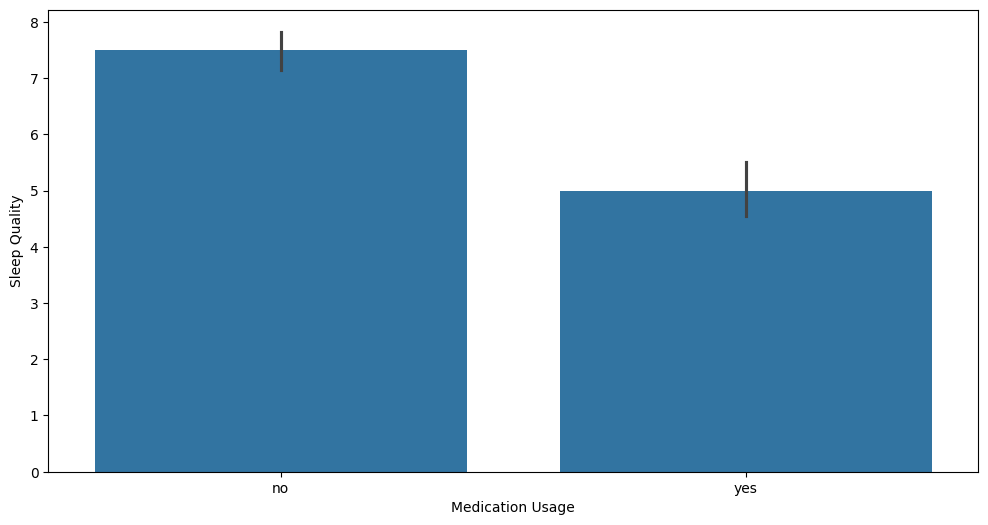

In [45]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Medication Usage', y = 'Sleep Quality', data = df)
plt.show()

In [46]:
medication_quality = df[df['Medication Usage'] == 'yes']['Sleep Quality']
no_medication_quality = df[df['Medication Usage'] == 'no']['Sleep Quality']

t_statistics, p_value = stats.ttest_ind(medication_quality, no_medication_quality, equal_var = False)

print(f't-statistics = {t_statistics: .2f}')
print(f'p-value = {p_value: .2f}')

t-statistics = -8.08
p-value =  0.00


##**Summary**

In [47]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending = False))

Sleep Quality              1.000000
Daily Steps                0.976277
Calories Burned            0.973557
Sleep Duration             0.918909
Dietary Habits             0.902498
Physical Activity Level    0.875203
Bedtime                    0.853312
User ID                   -0.014248
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


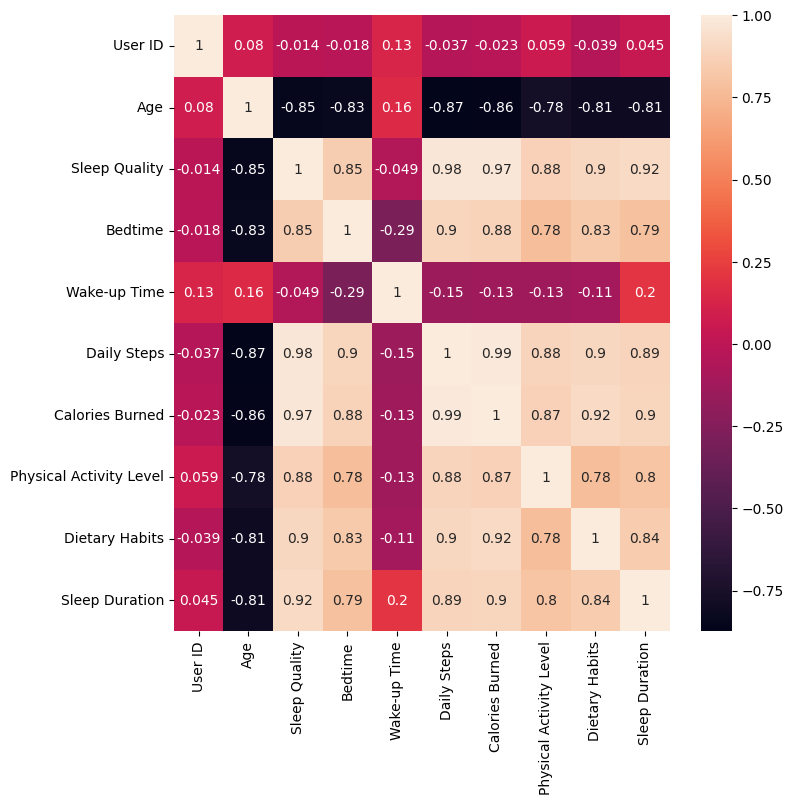

In [48]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr, annot = True)
plt.show()